# PHYS 225
## Intro to Computational Physics
### 10-25-2019

![Which is a best fit?](Week9C_best_fit_line.PNG)

## In words, what is your criterion for choosing the "best fit" line?


## In words, what is your criterion for choosing the "best fit" line?

### Possible Answer: The line that is closest to the data points.

## Can you express your criterion as mathematics?

Assume the data are given as a set of paired data points $(x_i, y_i)$.  

The fit function is $y = f(x, a, b, ...)$ and $a, b,...$ are fit parameters.

## Can you express your criterion as mathematics?

Assume the data are given as a set of paired data points $(x_i, y_i)$.  

The fit function is $y = f(x, a, b, ...)$ and $a, b,...$ are fit parameters.

### Possible Answers
Choose fit parameters $a, b,...$ that minimize
 
(a) $\sum |y_i - f(x_i, a, b,...)|$

(b) $\sum (y_i - f(x_i, a, b,...))^2$


![Best fit curve minimizing absolute value](PS9C_lecture_best_fit_abs.PNG)

## Answer: D, All of the above
    
![Best fit curve minimizing absolute value](PS9C_lecture_best_fit_abs.PNG)


![Best fit curve minimizing sum of squares](PS9C_lecture_best_fit_squares.PNG)

## Answer: A
### The sum of squares penalizes larger deviations more due to sum *of squares*
![Best fit curve minimizing sum of squares](PS9C_lecture_best_fit_squares.PNG)

## A note on optimization problems
As with "best fit curves" many physics problems and other everyday problems are optimization problems where some quantity is either minimized or maximiized.

With your neighbor, brainstorm a list of optimization problems relevant to 
1. physics, astronomy, or science generally
2. everyday life, business, etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import package that includes optimization
from scipy.optimize import curve_fit

Let's check out the [official documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html) for scipy.optimize.

## Steps for using curve_fit
1. You have a set of data $(x_i,y_i)$ containing the 
    * independent (a.k.a "manipulated") variable, usually denoted ${x_i}$
    * dependent (a.k.a. "responding") variable, usually denoted ${y_i}$
1. Define the "fit function" $y = f(x,a,b,...)$
1. Estimate some rough initial guesses for the fit parameters $a,b,...$
1. Throw it all into curve_fit

In [9]:
# load the data
data = np.loadtxt("my_pressure_data.csv", delimiter=",", skiprows = 1)
data

array([[0.00000000e+00, 9.87152832e+02],
       [3.84521490e-02, 9.87152832e+02],
       [7.69042970e-02, 9.87152832e+02],
       ...,
       [1.55231314e+02, 9.87136291e+02],
       [1.55269797e+02, 9.87136291e+02],
       [1.55308218e+02, 9.87142090e+02]])

In [46]:
# extract time and pressure arrays
t = data[:,0]  # time in seconds
p = data[:,1]  # pressure in hectopascals

In [47]:
# define the pressure to height conversion function
def p_to_h(pressure) :
    """ Convert pressure in pascals to height in meters """
    height = (1 - (pressure/101325)**(1/5.25588))/2.25577e-5
    return height

In [48]:
# define the y heights
y = p_to_h(100*p)

Text(37, 210, 'Gosnell A level')

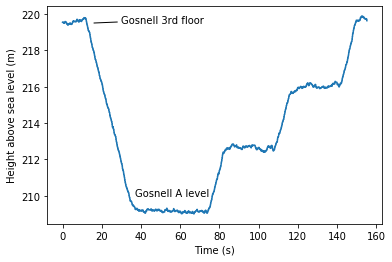

In [49]:
# create a plot
plt.plot(t,y)
plt.ylabel("Height above sea level (m)")
plt.xlabel("Time (s)")
plt.annotate(s="Gosnell 3rd floor", xy = (15,219.50), xytext=(30, 219.5),
            arrowprops=dict(arrowstyle='-'))
plt.annotate(s="Gosnell A level", xy = (37,210))

## Pick the subset of data to fit

Text(0.5, 0, 'Time (s)')

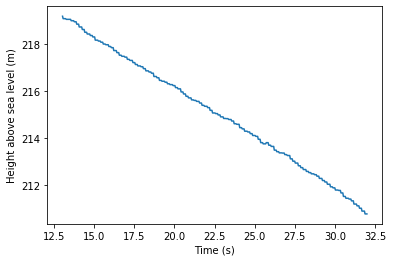

In [26]:
condition = np.logical_and(t>13, t<32)
tdown = t[condition]
ydown = y[condition]
plt.plot(tdown, ydown)
plt.ylabel("Height above sea level (m)")
plt.xlabel("Time (s)")

## Define the fit function

In [27]:
def const_vel(t,y0, v) :
    """ 
    Constant velocity model 
    Inputs 
    t - time (s), 
    y0 - initial position (m) 
    v - initial velocity (m/s)
    returns y (m) at a particular time
    """
    y = y0 + v*t
    return y

## Determine initial fit parameter guesses

Get a rough idea from the graph. Often 1 significant digit is enough.

In [28]:
y0guess = 220
vguess = -0.5

## Plug it all into `curve_fit()`

In [54]:
# apply curve_fit
curve_fit(f=const_vel, xdata = tdown, \
         ydata = ydown, p0 = [y0guess, vguess])

(array([224.82598516,  -0.43250932]),
 array([[ 1.86899916e-04, -7.83670133e-06],
        [-7.83670133e-06,  3.48085305e-07]]))

In [53]:
# unpack the best fit and covariance parameters
pbest, pcov = curve_fit(f=const_vel, xdata = tdown, \
         ydata = ydown, p0 = [y0guess, vguess])

print(pbest)

[224.82598516  -0.43250932]


In [32]:
# extract the best fit parameters
y0best = pbest[0]
vbest = pbest[1]

## Make a plot of data + fit

Text(0, 0.5, 'Elevator height above sea level (m)')

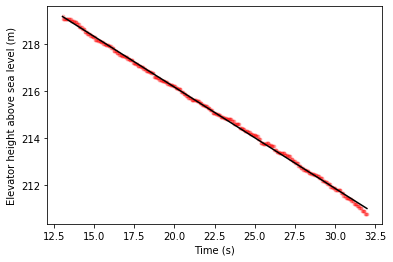

In [52]:
# make a plot of the data + fit
plt.plot(tdown, ydown, '.r', alpha=0.2)

yfit = const_vel(tdown, y0best, vbest)
plt.plot(tdown, yfit, 'k')
plt.xlabel("Time (s)")
plt.ylabel("Elevator height above sea level (m)")

## Plot the residuals
The residuals are the difference between the data and the best fit curve.

Text(0, 0.5, 'Residuals (m)')

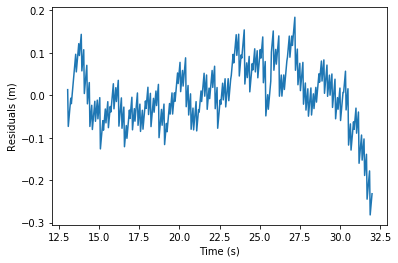

In [51]:
yfit = const_vel(tdown, y0best, vbest)
residuals = ydown - yfit

plt.plot(tdown, residuals)
plt.xlabel("Time (s)")
plt.ylabel("Residuals (m)")